In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
import pandas as pd

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-07-27 18:41:46,171 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-07-27 18:41:46,172 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-07-27 18:41:46,173 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-07-27 18:41:46,173 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-07-27 18:41:46,173 Parameters: cosmological_simulation   = 0.0


In [3]:
def make_ray(x0, y0, z0, x, y, z, num):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray'+num+'.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [4]:
ray2 = make_ray(1.0528,0,0.518, 1.0528, 1, 0.518, '2')
ray3 = make_ray(1.0833,0,0.478, 1.0833, 1, 0.478, '3')

yt : [INFO     ] 2022-07-27 18:41:46,519 Getting segment at z = 0.0: [0.5264 0.     0.259 ] unitary to [0.5264 0.5    0.259 ] unitary.
/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/yt/units/yt_array.py:1416: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(np.asarray(inps[0]), np.asarray(inps[1]),
yt : [INFO     ] 2022-07-27 18:41:46,522 Getting subsegment: [0.5264 unitary, 0.0 unitary, 0.259 unitary] to [0.5264 unitary, 0.5 unitary, 0.259 unitary].
yt : [INFO     ] 2022-07-27 18:41:47,164 Saving field data to yt dataset: ray2.h5.
yt : [INFO     ] 2022-07-27 18:41:47,251 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-07-27 18:41:47,252 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-07-27 18:41:47,252 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-07-27 18:41:47,252 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt 

In [5]:
ray2.derived_field_list

yt : [INFO     ] 2022-07-27 18:41:47,980 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-07-27 18:41:47,986 Identified 1.210e+02 octs


[('all', 'H_nuclei_density'),
 ('all', 'density'),
 ('all', 'dl'),
 ('all', 'dx'),
 ('all', 'dy'),
 ('all', 'dz'),
 ('all', 'l'),
 ('all', 'metallicity'),
 ('all', 'redshift'),
 ('all', 'redshift_dopp'),
 ('all', 'redshift_eff'),
 ('all', 'relative_velocity_x'),
 ('all', 'relative_velocity_y'),
 ('all', 'relative_velocity_z'),
 ('all', 'temperature'),
 ('all', 'velocity_los'),
 ('all', 'x'),
 ('all', 'y'),
 ('all', 'z'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'density'),
 ('gas', 'dl'),
 ('gas', 'dx'),
 ('gas', 'dy'),
 ('gas', 'dynamical_time'),
 ('gas', 'dz'),
 ('gas', 'emission_measure'),
 ('gas', 'entropy'),
 ('gas', 'kT'),
 ('gas', 'l'),
 ('gas', 'mazzotta_weighting'),
 ('gas', 'metallicity'),
 ('gas', 'path_element_x'),
 ('gas', 'path_element_y'),
 ('gas', 'path_element_z'),
 ('gas', 'redshi

In [15]:
def v_plots(ray, x,y,z,num, rx,ry,rz,dx_,dy_,dz_,
            vmin_1=-200, vmax_1=200, vmin_2=-172, vmax_2=172):
    pos = (np.array(ray.all_data()['gas', 'y'])*(1/3.086E+21))-5 #kpc
    v_los = np.array(ray.all_data()['gas','velocity_los'])*1.0E-5 #km/s
    v_y = np.array(ds.all_data()['gas','relative_velocity_y'])*1.0E-5 #km/s
    
    a = v_y.reshape(512, 256, 256)
    ax_x = np.arange(513)*(20/512)-10
    ax_y = np.arange(257)*(20/512)-5
    ax_z = np.arange(257)*(20/512)-5
    get_cmap('cet_CET_D2')
    get_cmap('cet_CET_D6')
    
    fig = plt.figure(figsize=(14,12))
    fig.suptitle('Ray '+ num, fontsize=18)
    p1 = fig.add_subplot(2,2,1)
#     p1.set_facecolor('black')
    plt.pcolormesh(ax_x,ax_y,a[:,:,z].T,cmap = "cet_CET_D6")
    plt.xlabel('x [kpc]', fontsize=14)
    plt.ylabel('y [kpc]', fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    cb = plt.colorbar(pad=0.01) 
    cb.set_label(label='Relative y-velocity [km/s]', size=15)
    cb.ax.tick_params(labelsize='large')
    plt.clim(vmin=vmin_1, vmax=vmax_1)
    plt.arrow(rx,ry,dx_,dy_,length_includes_head=True,color='gainsboro',head_width=0.14, lw=1.15)
    
    p2 = fig.add_subplot(2,2,2)
#     p2.set_facecolor('black')
    plt.pcolormesh(ax_y,ax_z,a[x,:,:].T,cmap = "cet_CET_D6")
    plt.xlabel('y [kpc]', fontsize=14)
    plt.ylabel('z [kpc]', fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    cb2 = plt.colorbar(pad=0.01) 
    cb2.set_label(label='Relative y-velocity [km/s]', size=15)
    cb2.ax.tick_params(labelsize='large')
    plt.clim(vmin=vmin_2, vmax=vmax_2)
    plt.arrow(ry,rz,dy_,dz_,length_includes_head=True,color='gainsboro',head_width=0.14, lw=1.15)
    
    p3 = fig.add_subplot(2,1,2)
    plt.plot(pos,v_los,color='goldenrod', linewidth=2, zorder=1)
    plt.scatter(pos,v_los,color='dodgerblue', s=5, alpha=1, zorder=2)
    plt.xlabel('y [kpc]', fontsize=14)
    plt.xticks(fontsize=13)
    plt.ylabel('LOS Velocity [km/s]', fontsize=14)
    plt.yticks(fontsize=13)
    
    plt.tight_layout(pad=3)
    
    print(np.min(a[:,:,z].T), np.max(a[:,:,z].T), ' First Plot')
    print(np.min(a[x,:,:].T), np.max(a[x,:,:].T), ' Second Plot')

-198.1626534551315 189.82704811333207  First Plot
-171.51839030268067 115.03717790657544  Second Plot


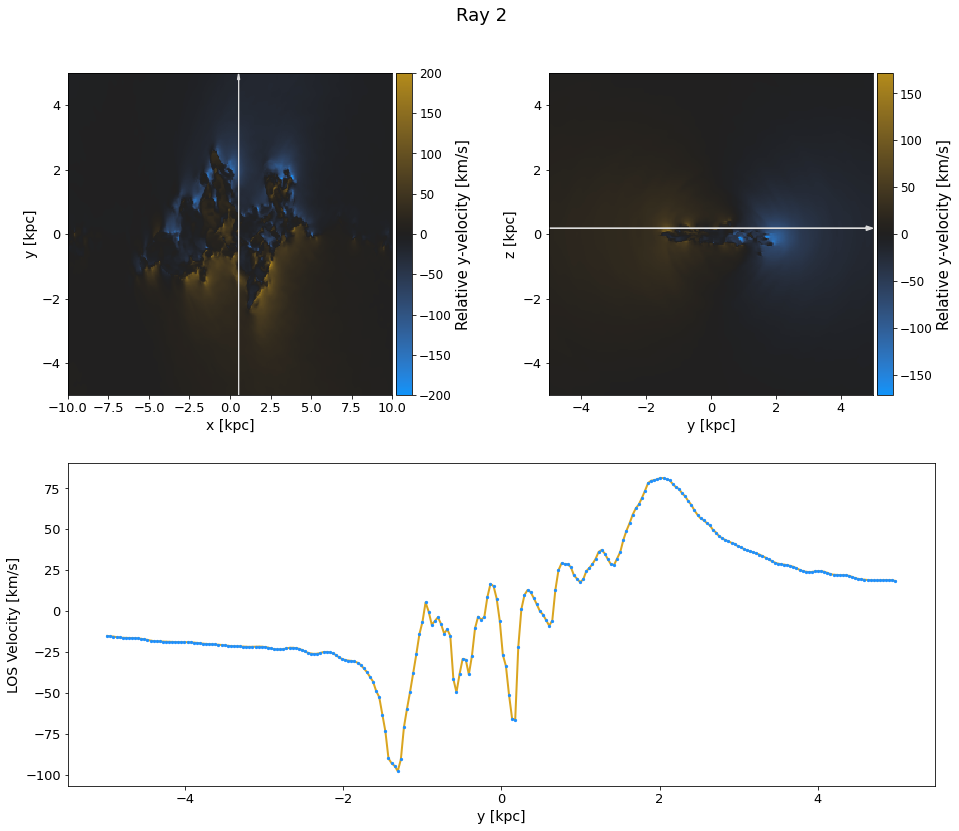

In [16]:
v_plots(ray2,x=269,y=123,z=132, num='2', rx=0.528,ry=-5,rz=0.18,dx_=0,dy_=10,dz_=0)

-212.7600074305331 214.5096119007126  First Plot
-187.34992340478155 157.35924910958917  Second Plot


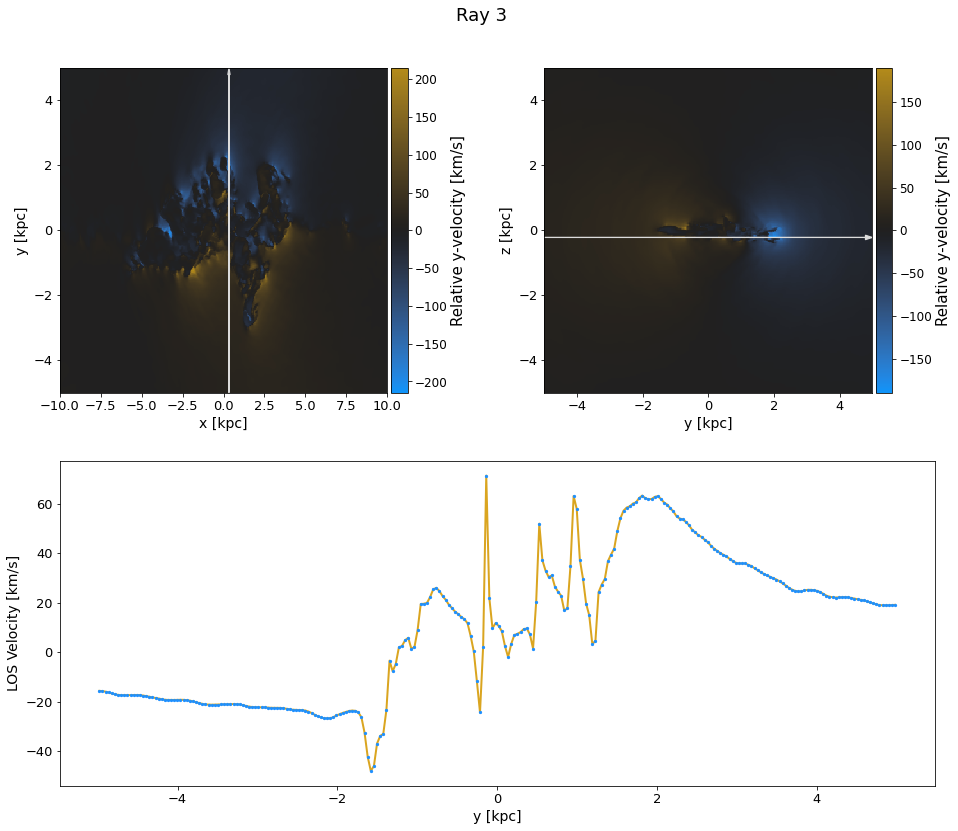

In [17]:
v_plots(ray3,x=264,y=128,z=122, num='3', vmin_1=-215, vmax_1=215,
       vmin_2=-190, vmax_2=190, rx=0.333,ry=-5,rz=-0.22,dx_=0,dy_=10,dz_=0)

In [93]:
ds.derived_field_list

[('gas', 'H_nuclei_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'cylindrical_radial_velocity'),
 ('gas', 'cylindrical_radial_velocity_absolute'),
 ('gas', 'cylindrical_tangential_velocity'),
 ('gas', 'cylindrical_tangential_velocity_absolute'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'density_gradient_y'),
 ('gas', 'density_gradient_z'),
 ('gas', 'dx'),
 ('gas', 'dy'),
 ('gas', 'dynamical_time'),
 ('gas', 'dz'),
 ('gas', 'emission_measure'),
 ('gas', 'entropy'),
 ('gas', 'kT'),
 ('gas', 'kinetic_energy'),
 ('gas', 'mazzotta_weighting'),
 ('gas', 'metallicity'),
 ('gas', 'path_element_x'),
 ('gas',